In [1]:
# Importing all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset in a dataframe using python
df=pd.read_csv("skyserver.csv")

df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
# shape of the data
df.shape

(10000, 18)

In [4]:
# data types
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [5]:
# information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
# columns in the dataset
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

# Summary Statistics

In [7]:
# Data Description 
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
# to check null values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

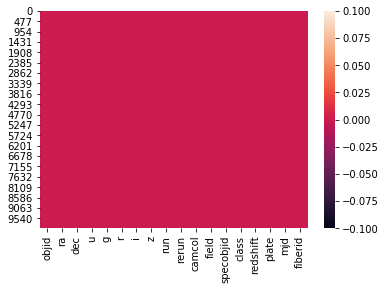

In [9]:
# checking null values using heatmap
sns.heatmap(df.isnull())

above heatmap suggest that there are no Nan values

# To check correlation

In [10]:
dfcor=df.corr()

dfcor

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


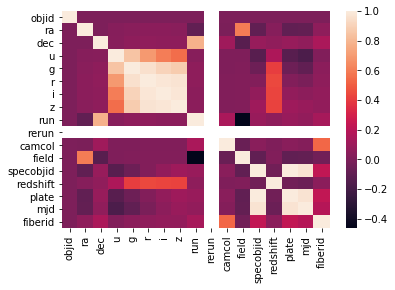

In [11]:
sns.heatmap(dfcor)

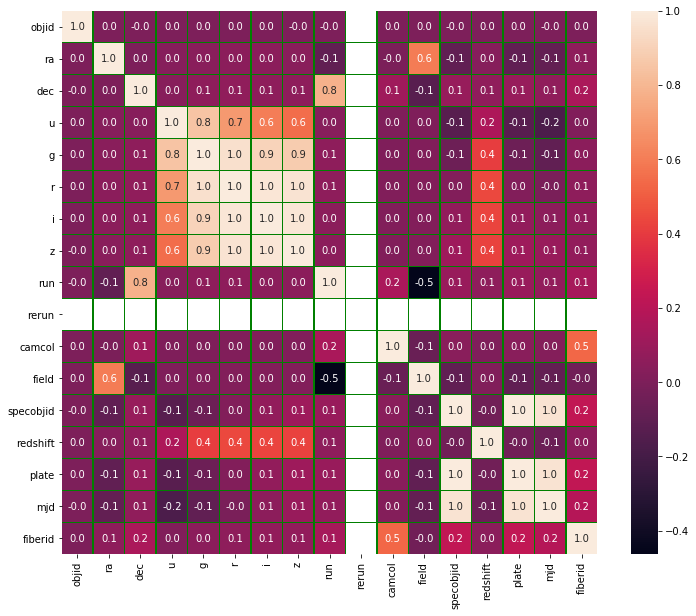

In [12]:
# Checking correlation using heatmap
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

From the above correlation heatmap we can see that columns u, g, r, i, z and redshift are highly correlated

# Exploratory Data Analysis

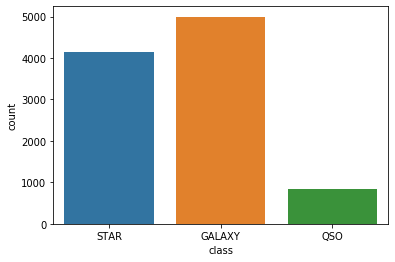

In [13]:
# plotting target class distribution
sns.countplot(df["class"])

Here we see that approx 5000 of the target class is 'Galaxy', which is about 50% of total, while, we have 40% as 'Star' and only 10%, 'QSO' so dataset is biased towards Galaxy and Star

In [14]:
df_n=df.drop("class",axis=1)

In [15]:
collist=df_n.columns.values
ncol=17
nrows=10

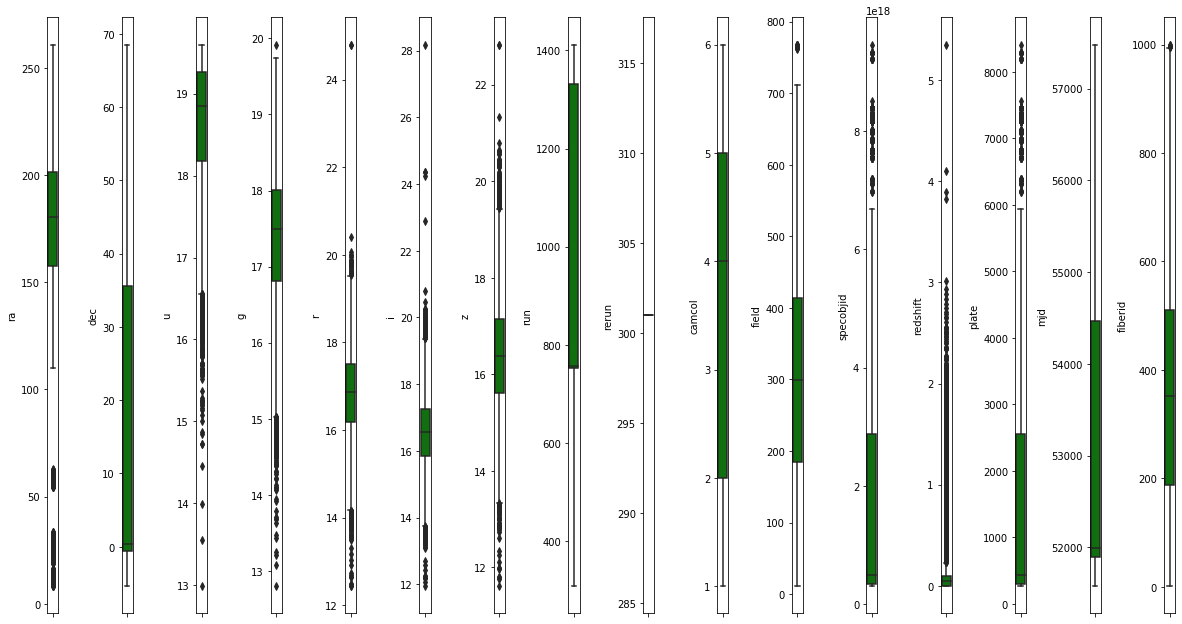

In [16]:
# Box Plot to check for outliers in the data set
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_n[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Bivariate Analysis

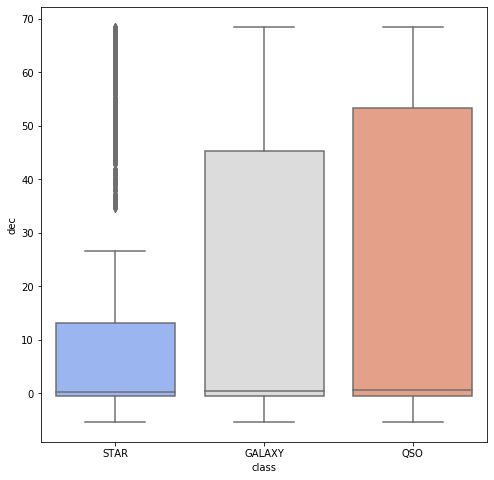

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x="class",y="dec",data=df,palette= "coolwarm")

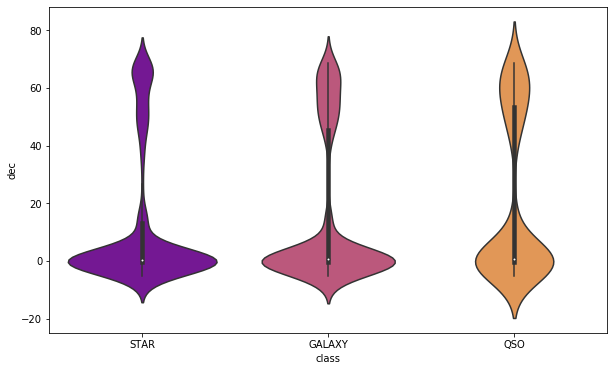

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x='class',y='dec',data=df,palette='plasma')

# studying the relation with some good correlated variables

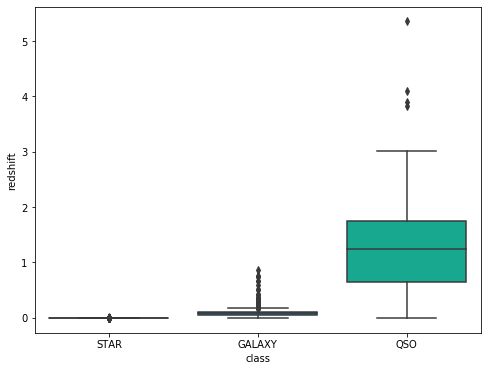

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class',y='redshift',data=df,palette='winter')

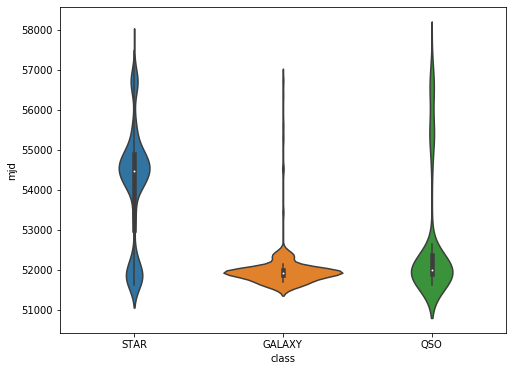

In [21]:
plt.figure(figsize=(8,6))
sns.violinplot(x='class',y='mjd',data=df)


 Dropping columns not relevant for training the model 

In [22]:
df.drop(["objid", "specobjid", "rerun"], axis = 1, inplace = True)

In [23]:
# Using LabelEncoder converting the labels into numeric form so as to convert it into the machine-readable form.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["class"]=le.fit_transform(df["class"])

In [24]:
df

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,0,0.014019,447,51877,229


In [25]:
#Splitting the dependent and independent variables here
x=df.drop("class",axis=1)
y=df["class"]

In [26]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.2)

In [28]:
# creating object files of all algorithms
KNN = KNeighborsClassifier(n_neighbors=6)
SV = SVC()
DT = DecisionTreeClassifier()

In [29]:
# appending all models in an empty list 
models = []
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",SV))
models.append(("DecisionTreeClassifier",DT))

*************************************** KNeighborsClassifier ***************************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score= 0.9065


Cross_Val_score= 0.8909999999999998


classification_report
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1020
           1       1.00      0.88      0.93       154
           2       0.95      0.83      0.89       826

    accuracy                           0.91      2000
   macro avg       0.94      0.89      0.91      2000
weighted avg       0.91      0.91      0.91      2000



[[989   0  31]
 [ 15 135   4]
 [137   0 689]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*************************************** SVC ***************************************************


SVC(C=1.0, break_ties=False, cache_

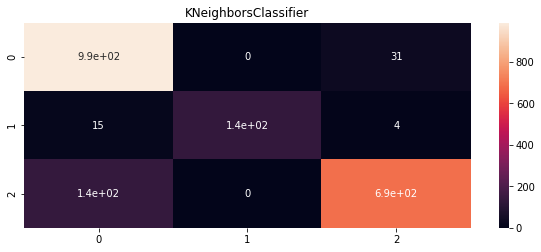

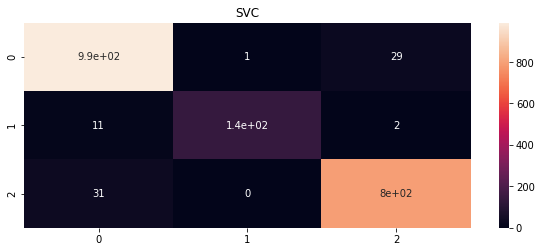

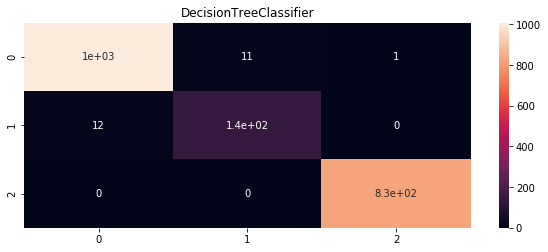

In [30]:
# Now using for loop we are calculating each and every parameter in a single cell
Model = []
score = []
cvs = []


for name,model in models:
    print("***************************************",name,"***************************************************")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pre)
    print("Accuracy score=",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("Cross_Val_score=",sc)
    cvs.append(sc*100)
    print("\n")
    print("classification_report\n",classification_report(y_test,pre))
    print("\n")
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print("\n\n")

In [31]:
# printing all  results obtained above in a dataframe
result=pd.DataFrame({"Model":Model,"Accuracy_score":score,"Cross_val_score":cvs})

result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,90.65,89.10
1,SVC,96.30,95.79
2,DecisionTreeClassifier,98.80,98.39


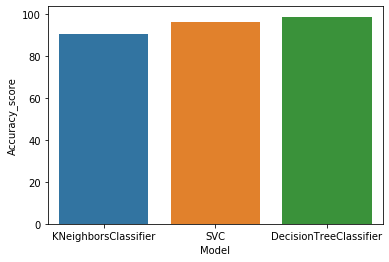

In [32]:
# visualizing all  results obtained
sns.barplot(x="Model",y="Accuracy_score",data=result)

In [33]:
# Using GridSearchCV to find out the best parameters of the model
from sklearn.model_selection import GridSearchCV
parameters={"kernel":["linear","rbf","poly"],"C":[1,10]}
svc = SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9888
linear
{'C': 10, 'kernel': 'linear'}


In [34]:
# Fitting the model again with the best parameter obtained using GridSearchCV
svc=SVC(kernel="linear",C=10)
svc.fit(x_train,y_train)
pre=svc.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

99.2


In [35]:
# finding out the best parameters of KNeighborsClassifier model using GridSearchCV
parameters={"n_neighbors":range(1,20)}
KNN = KNeighborsClassifier()
clf=GridSearchCV(KNN,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_params_)

0.8926000000000001
{'n_neighbors': 3}


In [36]:
# Fitting the model again with the best parameter obtained using GridSearchCV
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

91.0


In [37]:
# finding out the best parameters of DecisionTreeClassifier model using GridSearchCV
parameters={"criterion":["gini","entropy"]}
DT = DecisionTreeClassifier()
clf=GridSearchCV(DT,parameters,scoring="accuracy",cv=5)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_params_)

0.9856
{'criterion': 'entropy'}


In [38]:
# Fitting the model again with the best parameter obtained using GridSearchCV
DT = DecisionTreeClassifier(criterion="entropy")
DT.fit(x_train,y_train)
pre=DT.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

98.85000000000001


In [39]:
# Now lets use  RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(x_train,y_train)
pre=rf.predict(x_test)
AS=accuracy_score(y_test,pre)
print(AS*100)

99.2


*RandomForestClassifier outperfomed KNeighborsClassifier ,DecisionTreeClassifier,,
SupportVectorClassifier with an accuracy of 99.2

In [40]:
# saving the best model obtained
from sklearn.externals import joblib

In [41]:
joblib.dump(rf,"rfsky.obj")

['rfsky.obj']

In [42]:
model=joblib.load("rfsky.obj")

In [43]:
model.predict(x_test)

array([2, 0, 1, ..., 0, 1, 0])